In [1]:
import tensorflow as tf
from DRAWCell import DRAWCell
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.round(x_train)
x_test = np.round(x_test)

In [3]:
img_height, img_width = x_train[0].shape

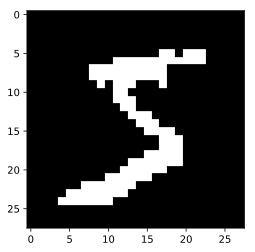

In [4]:
plt.imshow(x_train[0], cmap='gray')

In [5]:
# Training the standard-sized DRAW model on 28x28 mnist takes a couple of days... on a gpu.
# we are gonna downsample the images to speed things up.

resize_ratio = 1.0
img_width = int(resize_ratio * img_width)
img_height = int(resize_ratio * img_height)

In [6]:
# to further expedite training, we are using smaller rnns, a smaller z dim, and fewer timesteps
draw_cell = DRAWCell(
    img_width=img_width, 
    img_height=img_height, 
    img_channels=1, 
    enc_dim=256,
    z_dim=100,
    dec_dim=256, 
    read_dim=2,
    write_dim=5,
    num_timesteps=64)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

In [ ]:
num_training_steps = 10000
batch_size = 100

num_epochs = num_training_steps // (x_train.shape[0] // batch_size)

for epoch in range(0,num_epochs):
    np.random.shuffle(x_train)
    
    for idx in range(0, x_train.shape[0], batch_size):
        batch = x_train[idx:(idx+batch_size), :, :]
        imgs = [np.expand_dims(scipy.ndimage.zoom(img, zoom=resize_ratio), 2) \
                for img in batch]
        imgs = np.round(np.array(imgs))
        elbo, gradnorm = draw_cell.train(sess, imgs)
        if idx == 0 or (idx >= 1000 and (idx % 1000 == 0)):
            print('Epoch {}, idx {}..... ELBO: {}.... GRADNORM {}'.format(epoch, idx, elbo, gradnorm))

Epoch 0, idx 0..... ELBO: -610.2452392578125.... GRADNORM 452.04583740234375
Epoch 0, idx 1000..... ELBO: -327.2052917480469.... GRADNORM 431.5325622558594
Epoch 0, idx 2000..... ELBO: -220.73828125.... GRADNORM 342.0793151855469
Epoch 0, idx 3000..... ELBO: -397.6019287109375.... GRADNORM 474.9999694824219
Epoch 0, idx 4000..... ELBO: -218.2733917236328.... GRADNORM 313.008544921875
Epoch 0, idx 5000..... ELBO: -215.77867126464844.... GRADNORM 312.71221923828125
Epoch 0, idx 6000..... ELBO: -222.6488494873047.... GRADNORM 236.40902709960938
Epoch 0, idx 7000..... ELBO: -216.03005981445312.... GRADNORM 338.1182861328125
Epoch 0, idx 8000..... ELBO: -208.31674194335938.... GRADNORM 327.4097900390625
Epoch 0, idx 9000..... ELBO: -199.0982666015625.... GRADNORM 314.0054626464844
Epoch 0, idx 10000..... ELBO: -205.01771545410156.... GRADNORM 314.1115417480469
Epoch 0, idx 11000..... ELBO: -207.68438720703125.... GRADNORM 312.5706481933594
Epoch 0, idx 12000..... ELBO: -199.83038330078125..

Epoch 1, idx 42000..... ELBO: -121.65451049804688.... GRADNORM 311.2663879394531
Epoch 1, idx 43000..... ELBO: -123.27347564697266.... GRADNORM 289.2022705078125
Epoch 1, idx 44000..... ELBO: -124.27218627929688.... GRADNORM 324.59747314453125
Epoch 1, idx 45000..... ELBO: -121.19647216796875.... GRADNORM 331.80126953125
Epoch 1, idx 46000..... ELBO: -121.51732635498047.... GRADNORM 352.22967529296875
Epoch 1, idx 47000..... ELBO: -123.71537017822266.... GRADNORM 415.6507568359375
Epoch 1, idx 48000..... ELBO: -124.56378936767578.... GRADNORM 329.63787841796875
Epoch 1, idx 49000..... ELBO: -125.92707061767578.... GRADNORM 324.9322204589844
Epoch 1, idx 50000..... ELBO: -120.77437591552734.... GRADNORM 319.8521423339844
Epoch 1, idx 51000..... ELBO: -123.3327407836914.... GRADNORM 328.2918395996094
Epoch 1, idx 52000..... ELBO: -123.35675811767578.... GRADNORM 314.6280212402344
Epoch 1, idx 53000..... ELBO: -118.99744415283203.... GRADNORM 327.6524353027344
Epoch 1, idx 54000..... ELBO

Epoch 3, idx 25000..... ELBO: -93.25184631347656.... GRADNORM 319.1546325683594
Epoch 3, idx 26000..... ELBO: -105.79816436767578.... GRADNORM 334.00433349609375
Epoch 3, idx 27000..... ELBO: -95.4073715209961.... GRADNORM 312.0214538574219
Epoch 3, idx 28000..... ELBO: -98.70311737060547.... GRADNORM 317.70001220703125
Epoch 3, idx 29000..... ELBO: -98.06491088867188.... GRADNORM 317.23223876953125
Epoch 3, idx 30000..... ELBO: -97.83332824707031.... GRADNORM 358.3718566894531
Epoch 3, idx 31000..... ELBO: -98.71862030029297.... GRADNORM 320.0716552734375
Epoch 3, idx 32000..... ELBO: -97.880615234375.... GRADNORM 349.01544189453125
Epoch 3, idx 33000..... ELBO: -100.19053649902344.... GRADNORM 347.1882019042969
Epoch 3, idx 34000..... ELBO: -105.24699401855469.... GRADNORM 334.3440856933594
Epoch 3, idx 35000..... ELBO: -94.2431411743164.... GRADNORM 338.6432800292969
Epoch 3, idx 36000..... ELBO: -96.6976089477539.... GRADNORM 330.4061279296875
Epoch 3, idx 37000..... ELBO: -96.3874

Epoch 5, idx 8000..... ELBO: -90.3968734741211.... GRADNORM 371.69140625
Epoch 5, idx 9000..... ELBO: -90.24009704589844.... GRADNORM 288.77923583984375
Epoch 5, idx 10000..... ELBO: -88.08573150634766.... GRADNORM 304.93939208984375
Epoch 5, idx 11000..... ELBO: -95.2383804321289.... GRADNORM 333.2816467285156
Epoch 5, idx 12000..... ELBO: -86.28389739990234.... GRADNORM 339.0667419433594
Epoch 5, idx 13000..... ELBO: -89.37545776367188.... GRADNORM 336.93048095703125
Epoch 5, idx 14000..... ELBO: -88.42357635498047.... GRADNORM 338.5409240722656
Epoch 5, idx 15000..... ELBO: -88.15161895751953.... GRADNORM 352.2358093261719
Epoch 5, idx 16000..... ELBO: -88.01336669921875.... GRADNORM 364.67889404296875
Epoch 5, idx 17000..... ELBO: -87.8571548461914.... GRADNORM 336.0927429199219
Epoch 5, idx 18000..... ELBO: -91.54395294189453.... GRADNORM 349.69927978515625
Epoch 5, idx 19000..... ELBO: -92.29056549072266.... GRADNORM 333.55755615234375
Epoch 5, idx 20000..... ELBO: -94.1359558105

Epoch 6, idx 51000..... ELBO: -87.75308227539062.... GRADNORM 347.34307861328125
Epoch 6, idx 52000..... ELBO: -85.04579162597656.... GRADNORM 328.9797668457031
Epoch 6, idx 53000..... ELBO: -84.23797607421875.... GRADNORM 294.7316589355469
Epoch 6, idx 54000..... ELBO: -88.27667999267578.... GRADNORM 333.5777893066406
Epoch 6, idx 55000..... ELBO: -82.7510757446289.... GRADNORM 278.21063232421875
Epoch 6, idx 56000..... ELBO: -84.9365005493164.... GRADNORM 366.916015625
Epoch 6, idx 57000..... ELBO: -84.21839904785156.... GRADNORM 352.04376220703125
Epoch 6, idx 58000..... ELBO: -87.64954376220703.... GRADNORM 324.43572998046875
Epoch 6, idx 59000..... ELBO: -85.4844741821289.... GRADNORM 304.9591979980469
Epoch 7, idx 0..... ELBO: -78.6053237915039.... GRADNORM 288.12750244140625
Epoch 7, idx 1000..... ELBO: -84.2884292602539.... GRADNORM 422.2145080566406
Epoch 7, idx 2000..... ELBO: -78.82173156738281.... GRADNORM 312.9886169433594
Epoch 7, idx 3000..... ELBO: -76.31298065185547...

Epoch 8, idx 35000..... ELBO: -81.13717651367188.... GRADNORM 455.123779296875
Epoch 8, idx 36000..... ELBO: -77.27852630615234.... GRADNORM 328.93450927734375
Epoch 8, idx 37000..... ELBO: -76.03350830078125.... GRADNORM 298.7389221191406
Epoch 8, idx 38000..... ELBO: -80.46406555175781.... GRADNORM 475.0
Epoch 8, idx 39000..... ELBO: -76.4524154663086.... GRADNORM 339.61444091796875
Epoch 8, idx 40000..... ELBO: -85.41300964355469.... GRADNORM 338.47222900390625
Epoch 8, idx 41000..... ELBO: -75.55072021484375.... GRADNORM 294.1791687011719
Epoch 8, idx 42000..... ELBO: -83.15094757080078.... GRADNORM 398.85906982421875
Epoch 8, idx 43000..... ELBO: -80.12381744384766.... GRADNORM 333.2146301269531
Epoch 8, idx 44000..... ELBO: -75.73787689208984.... GRADNORM 317.67498779296875
Epoch 8, idx 45000..... ELBO: -78.42401885986328.... GRADNORM 330.7431640625
Epoch 8, idx 46000..... ELBO: -76.89825439453125.... GRADNORM 331.6213073730469
Epoch 8, idx 47000..... ELBO: -77.19053649902344....

Epoch 10, idx 19000..... ELBO: -77.60769653320312.... GRADNORM 332.6505432128906
Epoch 10, idx 20000..... ELBO: -73.58702850341797.... GRADNORM 317.5290832519531
Epoch 10, idx 21000..... ELBO: -73.81197357177734.... GRADNORM 306.4099426269531
Epoch 10, idx 22000..... ELBO: -70.55329132080078.... GRADNORM 293.1519470214844
Epoch 10, idx 23000..... ELBO: -76.87252044677734.... GRADNORM 317.6476135253906
Epoch 10, idx 24000..... ELBO: -79.80237579345703.... GRADNORM 422.33502197265625
Epoch 10, idx 25000..... ELBO: -74.8992691040039.... GRADNORM 322.8301086425781
Epoch 10, idx 26000..... ELBO: -75.95462036132812.... GRADNORM 423.8616638183594
Epoch 10, idx 27000..... ELBO: -78.64368438720703.... GRADNORM 347.2611083984375
Epoch 10, idx 28000..... ELBO: -74.00386047363281.... GRADNORM 313.3934631347656
Epoch 10, idx 29000..... ELBO: -76.86283874511719.... GRADNORM 421.30340576171875
Epoch 10, idx 30000..... ELBO: -75.6397933959961.... GRADNORM 330.1487121582031
Epoch 10, idx 31000..... ELB

In [9]:
output_sequence = draw_cell.sample(sess, num_imgs=8)

In [ ]:
list_ = []
for i in range(0,draw_cell.num_timesteps,8):
    img = output_sequence[:,i,:,:,0]
    list_.append(img)
    
sequences = np.concatenate(list_, axis=2)

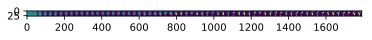

In [13]:
plt.imshow(sequences[0,:,:,0])

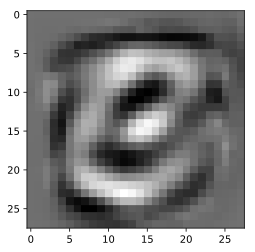

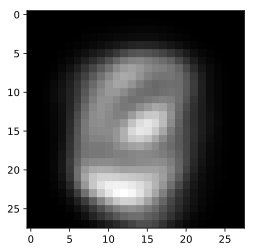

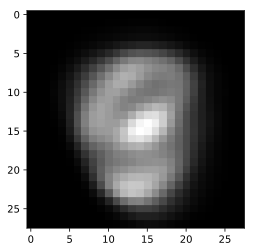

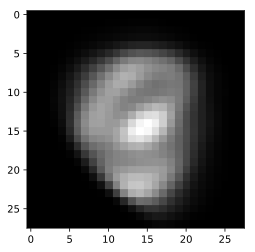

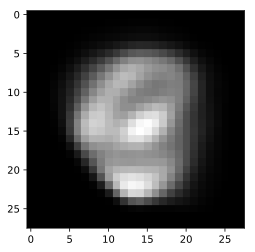

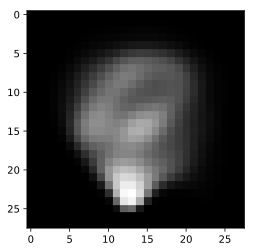

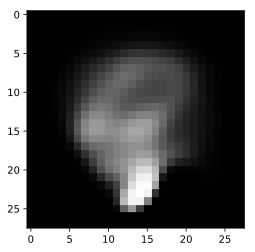

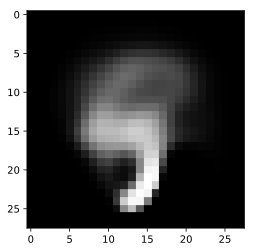

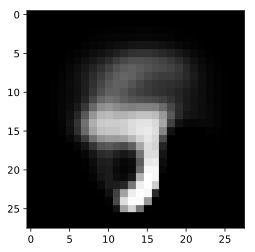

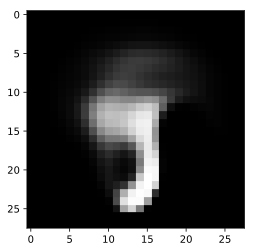

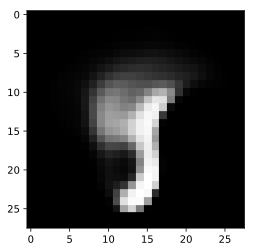

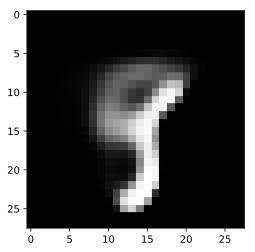

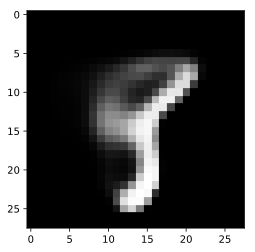

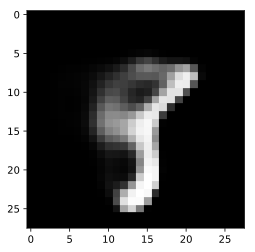

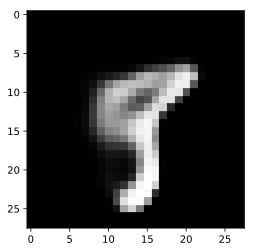

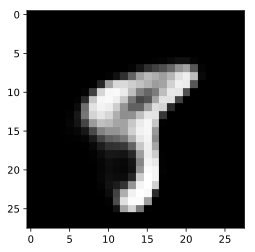

In [16]:
for i in range(0, 64, 4):
    plt.imshow(output_sequence[0,i,:,:,0], cmap='gray')
    plt.show()

In [17]:
output_sequence = draw_cell.reconstruct(sess, imgs)

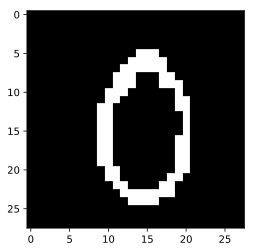

In [18]:
plt.imshow(imgs[0,:,:,0], cmap='gray')

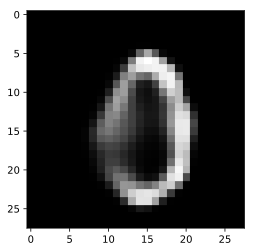

In [22]:
plt.imshow(output_sequence[0,-1,:,:,0], cmap='gray')